## Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

### Цель проекта

Научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры.
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность

Провести следующие исследования:

   -  Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
   -  Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
   -  Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
   -  Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
   -  Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
   -  Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
   -  Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

### Описание данных

| Название столбца     | Описание                                                         |
|----------------------|------------------------------------------------------------------|
| airports_nearest     | расстояние до ближайшего аэропорта в метрах (м)                  |
| balcony              | число балконов                                                   |
| ceiling_height       | высота потолков (м)                                              |
| cityCenters_nearest  | расстояние до центра города (м)                                  |
| days_exposition      | сколько дней было размещено объявление (от публикации до снятия) |
| first_day_exposition | дата публикации                                                  |
| floor                | этаж                                                             |
| floors_total         | всего этажей в доме                                              |
| is_apartment         | апартаменты (булев тип)                                          |
| kitchen_area         | площадь кухни в квадратных метрах (м²)                           |
| last_price           | цена на момент снятия с публикации                               |
| living_area          | жилая площадь в квадратных метрах (м²)                           |
| locality_name        | название населённого пункта                                      |
| open_plan            | свободная планировка (булев тип)                                 |
| parks_around3000     | число парков в радиусе 3 км                                      |
| parks_nearest        | расстояние до ближайшего парка (м)                               |
| ponds_around3000     | число водоёмов в радиусе 3 км                                    |
| ponds_nearest        | расстояние до ближайшего водоёма (м)                             |
| rooms                | число комнат                                                     |
| studio               | квартира-студия (булев тип)                                      |
| total_area           | площадь квартиры в квадратных метрах (м²)                        |
| total_images         | число фотографий квартиры в объявлении                           |

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [77]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymystem3 import Mystem
lemm = Mystem().lemmatize # создаем объект лемматизатора

from nltk import SnowballStemmer
stemm = SnowballStemmer('russian').stem # создаем объект стеммера

pd.options.display.max_columns = None

In [78]:
# загрузим наши данные
data = pd.read_csv('../data/real_estate_data.csv', sep='\t')

# посмотрим информацию о колонках
display(data.head(40))
display(data.info())
display(data.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Мы видим что у нас есть пропуски в следующих колонках:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest

В пропусках прослеживаются некоторые зависимости, такие как:
1. В столбцах airports_nearest и cityCenters_nearest имеется прямая зависимость между пропусками данных
2. В столбцах parks_around3000 и parks_nearest также имеется прямая зависимость между пропусками данных, также если в столбце parks_around3000 значение равное 0, то в parks_nearest присутствует пропуск
3. Аналогичная зависимость как в п.2 между столбцами ponds_around3000 и ponds_nearest
4. Пропуски в столбце balcony скорее всего указывают на его отсутствие, их можно заполнить нулями


## Шаг 2. Предобработка данных

In [79]:
# проверим, что если в airports_nearest пропуск, то и в cityCenters_nearest тоже
display(f"Пропусков в колонке airports_nearest: {len(data.query('airports_nearest.isna()'))}")
display(f"Пропусков в колонке cityCenters_nearest: {len(data.query('airports_nearest.isna() and cityCenters_nearest.isna()'))}")

'Пропусков в колонке airports_nearest: 5542'

'Пропусков в колонке cityCenters_nearest: 5518'

Пропуски почти совпадают. Только в 24 записях с пропуском в колонке airports_nearest присутствуют данные в колонке cityCenters_nearest. Зависимость определенно есть, в каких-то случаях пропуски все же заполняются. Стоит передать эту информацию коллегам, собравшим датасет.

Пропуски в airports_nearest можно заполнить средним или медианным значением дальности от аэропорта по каждому городу, но в больших городах, таких как СпБ, удаленность квартиры от аэропорта может измеряться десятками километров, а это может влиять на стоимость квартиры, мы пока не знаем. Для маленьких же городов это было бы корректно, т.к. можем считать, что все квартиры в пределах маленького города примерно равноудалены от аэропортов.

Посчитаем среднюю и медианную удаленность квартир в разных городах, исключив СпБ

In [80]:
data.query('locality_name != "Санкт-Петербург"').groupby('locality_name')['airports_nearest'].agg(['mean', 'median'])

,mean,median
locality_name,,
Бокситогорск,NaN,NaN
Волосово,NaN,NaN
Волхов,NaN,NaN
Всеволожск,NaN,NaN
Выборг,NaN,NaN
...,...,...
село Путилово,NaN,NaN
село Рождествено,NaN,NaN
село Русско-Высоцкое,NaN,NaN


Для большинства городов не хватает данных, чтобы посчитать удаленность от аэропорта, потому что по ним совсем нет данных.
Медианная и средняя удаленность у остальных не сильно отличаются, предпочтем заполнить пропуски медианной удаленностью квартир от аэропорта.

In [81]:
data['airports_nearest'] = data.query('locality_name != "Санкт-Петербург"').groupby('locality_name')['airports_nearest'].transform('median')

Для удаленности квартир от центра городов, такой способ не подходит. Поэтому оставим пропуски в столбце cityCenters_nearest как есть.

Займемся пропусками в столбцах parks_around3000 и parks_nearest.
Ранее мы выдвинули предположение, что в столбцах имеется прямая зависимость между пропусками данных, также если в столбце parks_around3000 значение равное 0, то в parks_nearest присутствует пропуск.
Проверим это.

In [82]:
display(f"Пропусков в колонке parks_around3000: {len(data.query('parks_around3000.isna()'))}")
display(f"Пропусков в колонке parks_nearest: {len(data.query('parks_around3000.isna() and parks_nearest.isna()'))}")

'Пропусков в колонке parks_around3000: 5518'

'Пропусков в колонке parks_nearest: 5518'

Действительно наблюдаем прямую зависимость между столбцами. Логично будет предположить, что пропуск в столбце parks_around3000 означает отсутствие парков в радиусе 3км, а значит и расстояние до ближайшего определить не удастся.

Т.о. заполним пропуски в столбце parks_around3000 значением 0, а в колонке parks_nearest оставим пропуски как есть.

In [83]:
data['parks_around3000'].fillna(0, inplace=True)
# проверим отсутствие пропусков в колонке parks_around3000
display(f"Количество пропусков в столбце parks_around3000: {len(data.query('parks_around3000.isna()'))}")

'Количество пропусков в столбце parks_around3000: 0'

Займемся пропусками в колонке is_apartment
Предположим, что пропуск в данной колонке, означает, что квартира не является апартаментами, т.о. заполним пропуски значением False

In [84]:
data['is_apartment'].fillna(False, inplace=True)
# проверим отсутствие пропусков в колонке is_apartment
display(f"Количество пропусков в столбце is_apartment: {len(data.query('is_apartment.isna()'))}")

'Количество пропусков в столбце is_apartment: 0'

Займемся пропусками в колонке ceiling_height
Предположим, что высота потолков может зависеть от: is_apartment, open_plan или studio
Проверим, есть ли явная зависимость высоты потолков от какого-либо из этих параметров

In [85]:
data.groupby(['is_apartment', 'open_plan', 'studio'])['ceiling_height'].agg('median')

is_apartment  open_plan  studio
False         False      False     2.65
                         True      2.70
              True       False     2.80
True          False      False     3.00
Name: ceiling_height, dtype: float64

Действительно от всех трех параметров есть довольно-таки четкая зависимость высоты потолков
Заполним пропуски полученной медианой

In [86]:
data['ceiling_height'] = data.groupby(['is_apartment', 'open_plan', 'studio'])['ceiling_height'].transform('median')
# проверим отсутствие пропусков в колонке ceiling_height
display(f"Количество пропусков в столбце ceiling_height: {len(data.query('ceiling_height.isna()'))}")

'Количество пропусков в столбце ceiling_height: 0'

Предположим, что пропуск в колонке balcony означает, что в квартире нет балкона, т.о. заполним пропуски значением 0

In [87]:
data['balcony'].fillna(0, inplace=True)
# проверим отсутствие пропусков в колонке ceiling_height
display(f"Количество пропусков в столбце balcony: {len(data.query('balcony.isna()'))}")

'Количество пропусков в столбце balcony: 0'

In [88]:
data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.65,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,NaN,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,17427.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,NaN,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,NaN,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,2.65,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,NaN,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,53426.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,NaN,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.65,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,NaN,15008.0,0.0,NaN,0.0,NaN,289.0


Также из информации о колонках можно сделать следующие выводы:
1. в колонке total_images тип int64, хотя диапазон чисел в этой колонке от 0 до 50 - можем изменить тип на int8
2. в колонке total_area тип float64, хотя диапазон чисел в этой колонке от 12 до 900 - можем изменить тип на float16
3. в колонке first_day_exposition необходимо преобразовать данные в datatype
4. в колонке rooms тип int64, хотя диапазон чисел в этой колонке от 0 до 19 - можем изменить тип на int8, также подозрительным выглядит значение 0 в данной колонке
5. в колонке ceiling_height тип float64, хотя диапазон чисел в этой колонке от 1 до 100 - можем изменить тип на float8, также подозрительным выглядит значение 1 в данной колонке
6. в колонке floors_total тип float64, хотя диапазон чисел в этой колонке от 1 до 60 и хранятся по факту целочисленные значения - можем изменить тип на int8
7. в колонке living_area тип float64, хотя диапазон чисел в этой колонке от 2 до 409.7 - можем изменить тип на float16
8. в колонке floor тип int64, хотя диапазон чисел в этой колонке от 1 до 33 - можем изменить тип на int8
9. в колонке is_apartment тип object, хотя в колонке хранятся булевы значения - можем изменить тип на bool
10. в колонке kitchen_area тип float64, хотя диапазон чисел в этой колонке от 1.3 до 112 - можем изменить тип на float8
11. в колонке balcony тип float64, хотя диапазон чисел в этой колонке от 0 до 5 и хранятся по факту целочисленные значения - можем изменить тип на int8
12. в колонке locality_name данные необходимо привести к нижнему регистру
13. в колонке airports_nearest тип float64, хотя диапазон чисел в этой колонке от 0 до 84869 - можем изменить тип на float32, также подозрительным выглядит значение 0 в данной колонке
14. в колонке cityCenters_nearest тип float64, хотя диапазон чисел в этой колонке от 181 до 65968 - можем изменить тип на float32, а также изменим название колонки на city_centers_nearest
15. в колонке parks_around3000 тип float64, хотя диапазон чисел в этой колонке от 0 до 3 и хранятся по факту целочисленные значения - можем изменить тип на int8, а также изменим название колонки на parks_around_3000
16. в колонке parks_nearest тип float64, хотя диапазон чисел в этой колонке от 1 до 31900 и хранятся по факту целочисленные значения - можем изменить тип на int8
17. в колонке ponds_around3000 тип float64, хотя диапазон чисел в этой колонке от 0 до 3 и хранятся по факту целочисленные значения - можем изменить тип на int8, а также изменим название колонки на ponds_around_3000
18. в колонке ponds_nearest тип float64, хотя диапазон чисел в этой колонке от 13 до 1344 - можем изменить тип на float16
19. в колонке days_exposition тип float64, хотя диапазон чисел в этой колонке от 1 до 15800 и хранятся по факту целочисленные значения - можем изменить тип на int16


In [89]:
# преобразуем типы колонок
data = data.astype(
    {
        'total_images': 'int8',
        'total_area': 'float16',
        'rooms': 'int8',
        'ceiling_height': 'float16',
        'floors_total': 'float16',
        'living_area': 'float16',
        'floor': 'int8',
        'is_apartment': 'bool',
        'kitchen_area': 'float16',
        'balcony': 'int8',
        'airports_nearest': 'float32',
        'cityCenters_nearest': 'float32',
        'parks_around3000': 'float16',
        'parks_nearest': 'float16',
        'ponds_around3000': 'float16',
        'ponds_nearest': 'float16',
        'days_exposition': 'float16'
    }
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int8   
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float16
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int8   
 5   ceiling_height        23699 non-null  float16
 6   floors_total          23613 non-null  float16
 7   living_area           21796 non-null  float16
 8   floor                 23699 non-null  int8   
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float16
 13  balcony               23699 non-null  int8   
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Преобразуем даты из строчного формата в datetime

In [90]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# убедимся, что проеобразование корректно
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int8          
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float16       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int8          
 5   ceiling_height        23699 non-null  float16       
 6   floors_total          23613 non-null  float16       
 7   living_area           21796 non-null  float16       
 8   floor                 23699 non-null  int8          
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float16       
 13  balcony         

## Шаг 3. Рассчитаем и добавим в таблицу новые данные

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [91]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00000,2019-03-07,3,2.650391,16.0,51.00000,8,False,False,False,25.000000,0,Санкт-Петербург,NaN,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40625,2018-12-04,1,2.650391,11.0,18.59375,1,False,False,False,11.000000,2,посёлок Шушары,17427.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00000,2015-08-20,2,2.650391,5.0,34.31250,4,False,False,False,8.296875,0,Санкт-Петербург,NaN,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00000,2015-07-24,3,2.650391,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,NaN,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00000,2018-06-19,2,2.650391,14.0,32.00000,13,False,False,False,41.000000,0,Санкт-Петербург,NaN,8098.0,2.0,112.0,1.0,48.0,121.0


In [92]:
# добавим столбец square_meter_price со значением цены за кв. метр в рублях
data['square_meter_price'] = data['last_price'] / data['total_area']

# добавим столбцы с информацией о дне недели, месяце и годе публикации
data['day'] = data['first_day_exposition'].dt.day
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# этаж квартиры (первый, последний, другой)
def floor_detect(raw: pd.Series) -> str:
    """
    Функция определения этажа
    """
    floor = raw['floor']
    # мы знаем, что в столбце floors_total есть пропуски
    try:
        floors_total = int(raw['floors_total'])
    except ValueError:
        floors_total = None

    if floor == 1:
        return 'первый'

    elif floors_total is not None:
        if floor == floors_total:
            return 'последний'
        else:
            return 'другой'

    else:
        return 'другой'

data['floor_name'] = data.apply(floor_detect, axis=1)

# соотношение жилой и общей площади
data['living_area_ratio'] = data['living_area'] / data['total_area']

# соотношение площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

# проверим что все корректно отработало
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day,month,year,floor_name,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.00000,2019-03-07,3,2.650391,16.0,51.00000,8,False,False,False,25.000000,0,Санкт-Петербург,NaN,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,7,3,2019,другой,0.472168,0.231445
1,7,3350000.0,40.40625,2018-12-04,1,2.650391,11.0,18.59375,1,False,False,False,11.000000,2,посёлок Шушары,17427.0,18603.0,0.0,NaN,0.0,NaN,81.0,82907.965971,4,12,2018,первый,0.460205,0.272217
2,10,5196000.0,56.00000,2015-08-20,2,2.650391,5.0,34.31250,4,False,False,False,8.296875,0,Санкт-Петербург,NaN,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,другой,0.612793,0.148193
3,0,64900000.0,159.00000,2015-07-24,3,2.650391,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,NaN,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,24,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00000,2018-06-19,2,2.650391,14.0,32.00000,13,False,False,False,41.000000,0,Санкт-Петербург,NaN,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,другой,0.320068,0.409912


## Шаг 4. Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построем гистограммы для каждого параметра.

'============================== ceiling_height =============================='

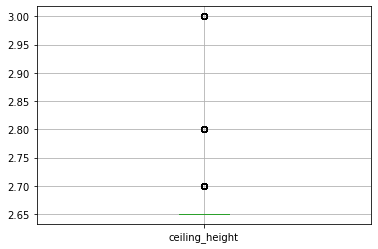

'============================== total_area =============================='

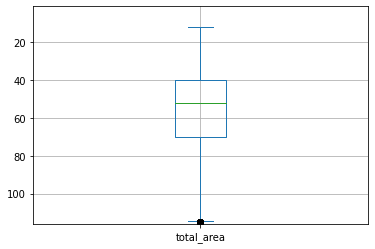

'============================== last_price =============================='

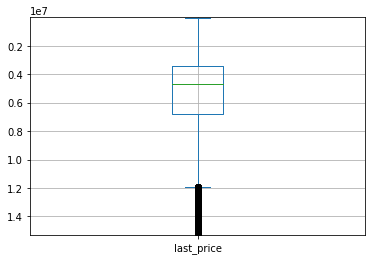

'============================== rooms =============================='

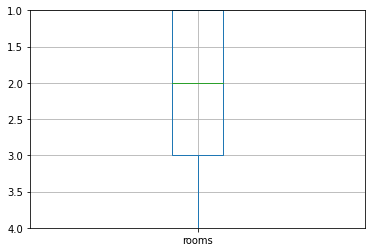

'============================== ceiling_height =============================='

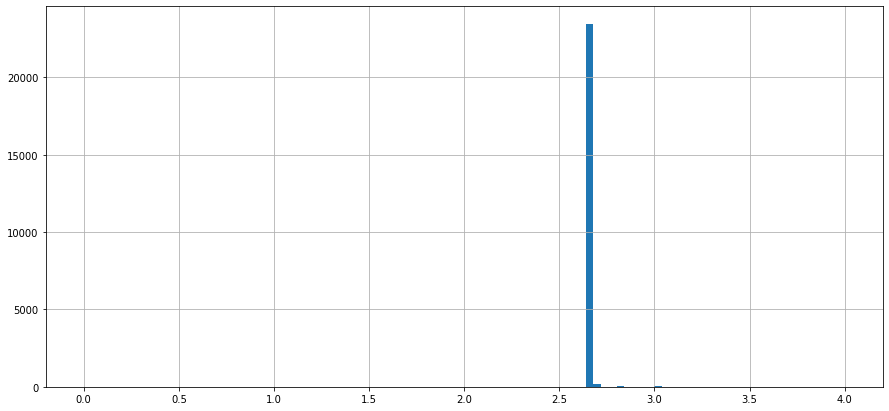

'============================== total_area =============================='

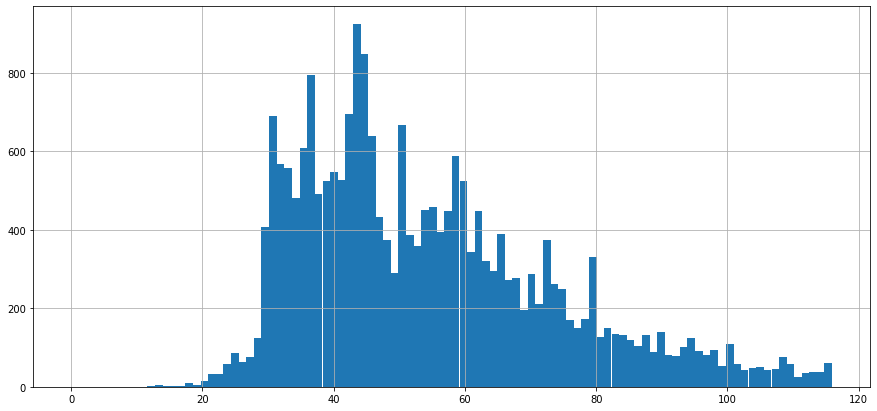

'============================== last_price =============================='

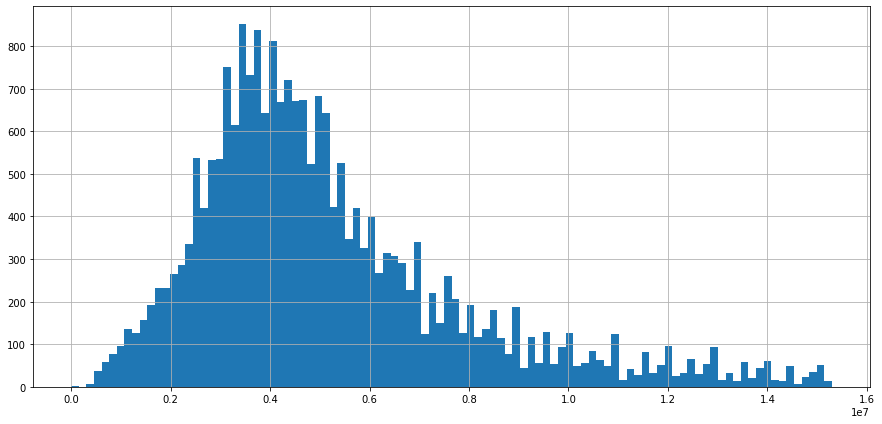

'============================== rooms =============================='

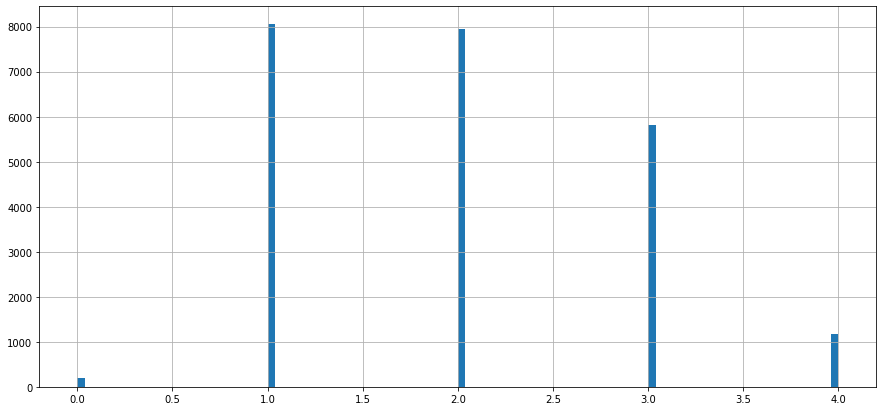

In [93]:
columns = ['ceiling_height', 'total_area', 'last_price', 'rooms']

for column in columns:
    # при установке лимита для колонки ceiling_height графики становятся нерепрезентативными
    if not column == 'ceiling_height':
        lim = np.percentile(data[column], 95)
        plt.ylim(lim)
    display(f"{'='*30} { column } {'='*30}")
    plt.show(data[column].plot(kind='box', grid=True))

# plt.show(data['total_area'].hist(bins=100, grid=True, figsize=(15, 7)))
# plt.show(data['total_area'].plot(kind='box', grid=True))
for column in columns:
    # при установке лимита для колонки ceiling_height графики становятся нерепрезентативными
    if not column == 'ceiling_height':
        lim = np.percentile(data[column], 95)
    display(f"{'='*30} { column } {'='*30}")
    plt.show(data[column].hist(bins=100, grid=True, figsize=(15, 7), range=(0, lim)))



Площадь квартир выставленных на продажу в основном лежит в рамках от 40 до 70кв.м., в среднем это 52кв.м.
Цена на квартиру варьируется в основном от 3.8 млн. до 6.4 млн., в среднем это 4.4млн.
Число комнат, как правило, 1 или 2, чуть менее популярны 3х комнатные квартиры.
Высота потолков почти всегда стандартная - 2.7м.

Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [94]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day,month,year,floor_name,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.00000,2019-03-07,3,2.650391,16.0,51.00000,8,False,False,False,25.000000,0,Санкт-Петербург,NaN,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,7,3,2019,другой,0.472168,0.231445
1,7,3350000.0,40.40625,2018-12-04,1,2.650391,11.0,18.59375,1,False,False,False,11.000000,2,посёлок Шушары,17427.0,18603.0,0.0,NaN,0.0,NaN,81.0,82907.965971,4,12,2018,первый,0.460205,0.272217
2,10,5196000.0,56.00000,2015-08-20,2,2.650391,5.0,34.31250,4,False,False,False,8.296875,0,Санкт-Петербург,NaN,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,другой,0.612793,0.148193
3,0,64900000.0,159.00000,2015-07-24,3,2.650391,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,NaN,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,24,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00000,2018-06-19,2,2.650391,14.0,32.00000,13,False,False,False,41.000000,0,Санкт-Петербург,NaN,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,другой,0.320068,0.409912


<AxesSubplot:>

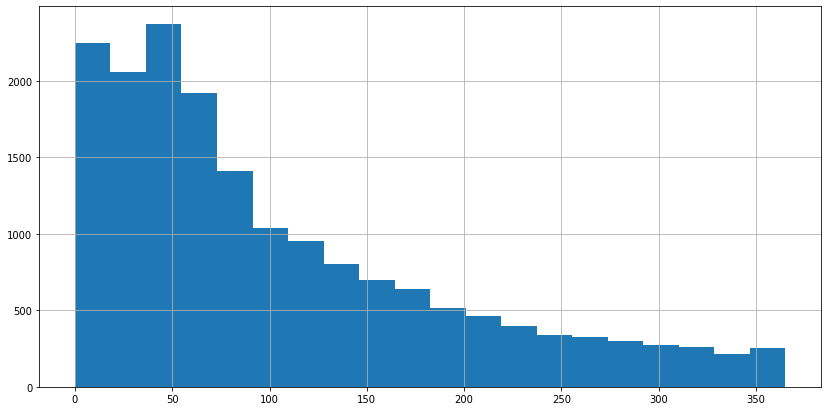

In [95]:
data['days_exposition'].hist(bins=20, grid=True, figsize=(14, 7), range=(0, 365))

In [96]:
display(data['days_exposition'].describe())

count    20518.0
mean         inf
std          inf
min          1.0
25%         45.0
50%         95.0
75%        232.0
max       1580.0
Name: days_exposition, dtype: float64

В среднем продажа квартиры занимает около 3х месяцев.
Судя по данным, можно считать, что квартира продалась быстро, если сделка состоялась быстрее 45 дней, а очень долго - больше 232 дней.

Опишем выбивающиеся значения

In [97]:
columns = ['last_price', 'rooms', 'days_exposition', 'total_area']

for column in columns:
    display("="*80)
    display(f"Для колонки {column} выбивающиеся значения являются следующими:")
    display(f"Все, что меньше: {round(abs(data[column].quantile(0.75) + (1.5 * (data[column].quantile(0.25) - data[column].quantile(0.75)))), 2)}")
    display(f"Все, что больше: {round(data[column].quantile(0.25) - (1.5 * (data[column].quantile(0.25) - data[column].quantile(0.75))), 2)}")


'================================================================================'

'Для колонки last_price выбивающиеся значения являются следующими:'

'Все, что меньше: 1700000.0'

'Все, что больше: 8500000.0'

'================================================================================'

'Для колонки rooms выбивающиеся значения являются следующими:'

'Все, что меньше: 0.0'

'Все, что больше: 4.0'

'================================================================================'

'Для колонки days_exposition выбивающиеся значения являются следующими:'

'Все, что меньше: 48.5'

'Все, что больше: 325.5'

'================================================================================'

'Для колонки total_area выбивающиеся значения являются следующими:'

'Все, что меньше: 25.06'

'Все, что больше: 84.81'

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.


In [98]:
# посмотрим, зависит ли цена от площади, числа комнат, удалённости от центра
data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.653678,0.363343,-0.206747
total_area,0.653678,1.000000,0.758347,-0.231447
rooms,0.363343,0.758347,1.000000,-0.184864
cityCenters_nearest,-0.206747,-0.231447,-0.184864,1.000000


In [108]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day,month,year,floor_name,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.00000,2019-03-07,3,2.650391,16.0,51.00000,8,False,False,False,25.000000,0,Санкт-Петербург,NaN,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,7,3,2019,другой,0.472168,0.231445
1,7,3350000.0,40.40625,2018-12-04,1,2.650391,11.0,18.59375,1,False,False,False,11.000000,2,посёлок Шушары,17427.0,18603.0,0.0,NaN,0.0,NaN,81.0,82907.965971,4,12,2018,первый,0.460205,0.272217
2,10,5196000.0,56.00000,2015-08-20,2,2.650391,5.0,34.31250,4,False,False,False,8.296875,0,Санкт-Петербург,NaN,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,другой,0.612793,0.148193
3,0,64900000.0,159.00000,2015-07-24,3,2.650391,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,NaN,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,24,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00000,2018-06-19,2,2.650391,14.0,32.00000,13,False,False,False,41.000000,0,Санкт-Петербург,NaN,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,другой,0.320068,0.409912


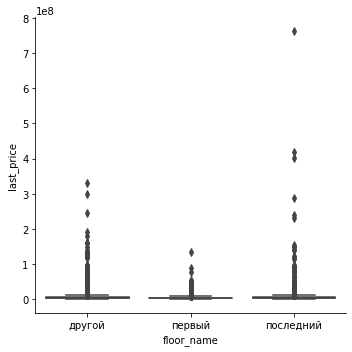

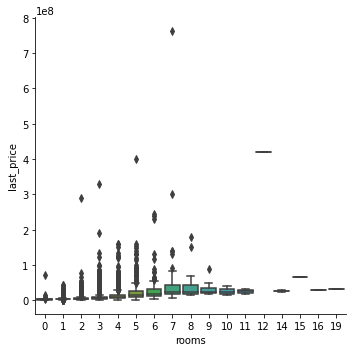

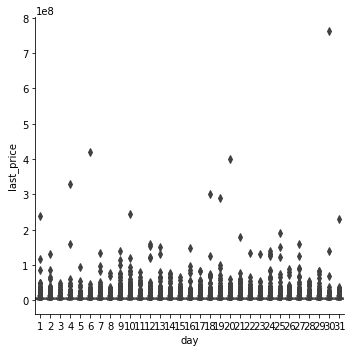

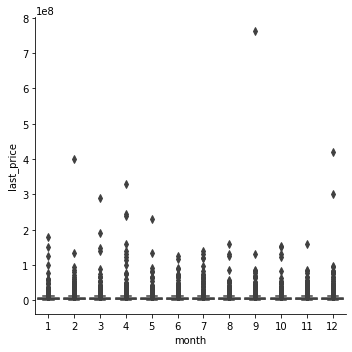

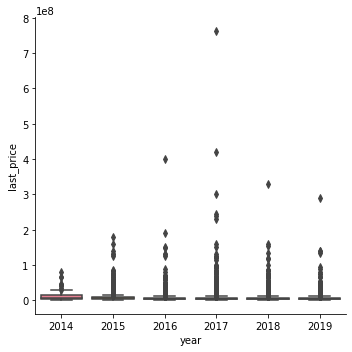

In [117]:
 # посмотрим, есть ли зависимость цены от того, на каком этаже расположена квартира
for column in ['floor_name', 'rooms', 'day', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=data, palette='husl')

In [ ]:
print(f'int8: {2**8}; int16: {2**16}, int32: {2**32}, int64: {2**64}')